In [29]:
import re
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from analysis.python_technologies import python_technologies_list

In [2]:
df = pd.read_csv("../data/vacancies.csv")

df.head()

,company,description,exp_level,location,placing_date,salary,title
0,bART Solutions,About us: bART Solutions is a Ukraine based p...,0-1,Львів,1 листопада 2024,NaN,Junior Python Engineer
1,Astronics CSC,"— Python, Linux (Ubuntu, Yocto, Debian), MySQL...",0-1,Львів,14 жовтня 2024,від $800,Junior/Middle Python Developer
2,Geniusee,Our mission at Geniusee is to help businesses ...,1-3,віддалено,8 листопада 2024,NaN,Middle Python Developer
3,Quod Financial,Must have: At lest 6 months of working with Py...,0-1,"Гданськ (Польща), віддалено",31 жовтня 2024,NaN,QA General (Trainee/Junior) with Python
4,Deloitte,"Responsibilities: Develop, modify, and maintai...",1-3,"Київ, віддалено",8 листопада 2024,NaN,Middle Python Developer (Ukraine location only)


In [3]:
def find_technologies(description: str) -> str:
    found_techs = []
    for tech in python_technologies_list:
        if re.search(r"\b" + re.escape(tech) + r"\b", description, re.IGNORECASE):
            found_techs.append(tech)
    return ", ".join(found_techs)

df["technologies"] = df["description"].apply(find_technologies)

df.head()

,company,description,exp_level,location,placing_date,salary,title,technologies
0,bART Solutions,About us: bART Solutions is a Ukraine based p...,0-1,Львів,1 листопада 2024,NaN,Junior Python Engineer,"alembic, aws, controlpanel, django, github, po..."
1,Astronics CSC,"— Python, Linux (Ubuntu, Yocto, Debian), MySQL...",0-1,Львів,14 жовтня 2024,від $800,Junior/Middle Python Developer,"aws, git, jira, linux, mysql, restful api"
2,Geniusee,Our mission at Geniusee is to help businesses ...,1-3,віддалено,8 листопада 2024,NaN,Middle Python Developer,"aws, docker, flask, pandas, sql, sqlalchemy"
3,Quod Financial,Must have: At lest 6 months of working with Py...,0-1,"Гданськ (Польща), віддалено",31 жовтня 2024,NaN,QA General (Trainee/Junior) with Python,"git, jira, linux, scrum, sql"
4,Deloitte,"Responsibilities: Develop, modify, and maintai...",1-3,"Київ, віддалено",8 листопада 2024,NaN,Middle Python Developer (Ukraine location only),"asyncio, aws, azure, celery, ci/cd, docker, fa..."


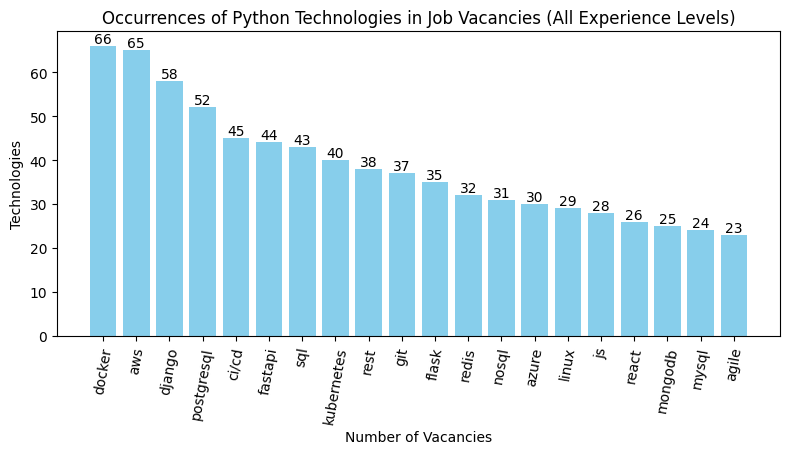

In [27]:
all_techs = df["technologies"].str.split(", ").explode()

tech_counts = all_techs.value_counts().head(20)

plt.figure(figsize=(8, 4))
plt.bar(tech_counts.index, tech_counts.values, color="skyblue")
plt.xlabel("Number of Vacancies")
plt.ylabel("Technologies")
plt.title("Occurrences of Python Technologies in Job Vacancies (All Experience Levels)")

for j, value in enumerate(tech_counts.values):
    plt.annotate(str(value), xy=(j, value), ha="center", va="bottom")

plt.tight_layout()
plt.xticks(rotation=80)

plt.savefig(f"plots/top-20-technologies-all-{datetime.now().strftime('%d-%m-%y')}.png", format="png")

plt.show()

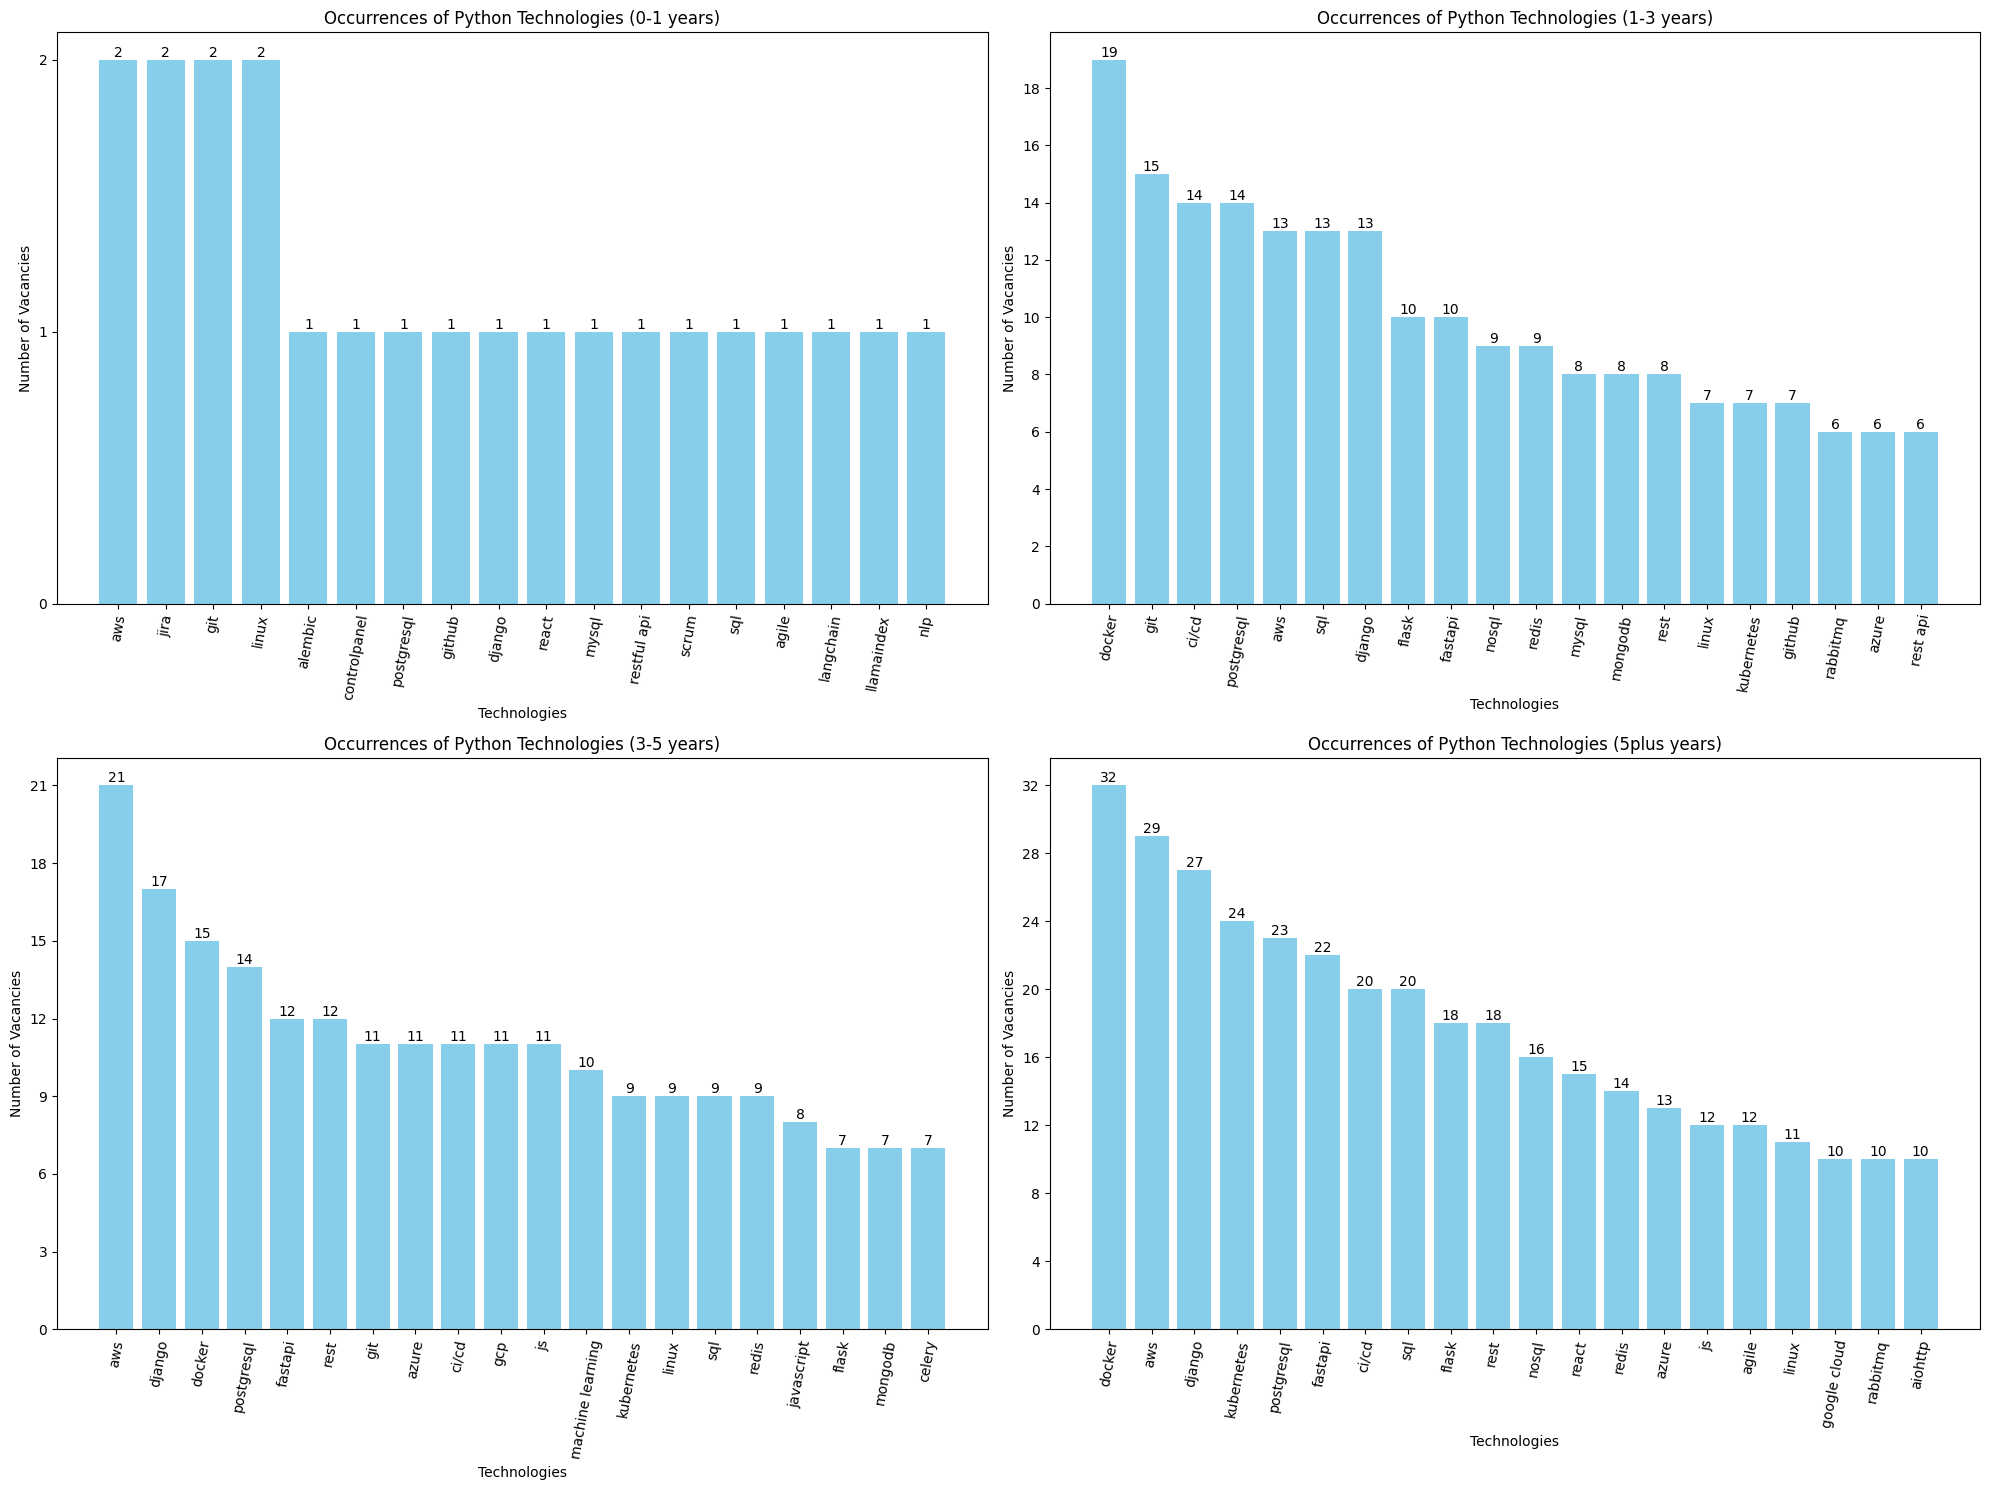

In [30]:
experience_levels = ["0-1", "1-3", "3-5", "5plus"]

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

axes = axes.flatten()

for i, exp in enumerate(experience_levels):
    df_exp = df[df["exp_level"] == exp]
    all_techs = df_exp["technologies"].str.split(", ").explode()
    tech_counts = all_techs.value_counts().head(20)
    
    axes[i].bar(tech_counts.index, tech_counts.values, color="skyblue")
    axes[i].set_xlabel("Technologies")
    axes[i].set_ylabel("Number of Vacancies")
    axes[i].set_title(f"Occurrences of Python Technologies ({exp} years)")
    axes[i].tick_params(axis="x", rotation=80)
    
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))
    
    for j, value in enumerate(tech_counts.values):
        axes[i].annotate(str(value), xy=(j, value), ha="center", va="bottom")

plt.tight_layout()

plt.savefig(f"plots/top-20-technologies-details-{datetime.now().strftime('%d-%m-%y')}.png", format="png")

plt.show()

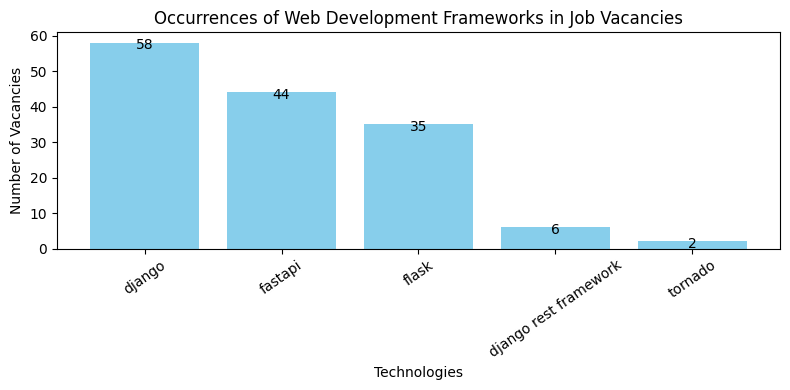

In [39]:
web_development_frameworks = ["django", "django rest framework", "flask", "fastapi", "tornado"]

all_techs = df["technologies"].str.split(", ").explode()
tech_counts = all_techs[all_techs.isin(web_development_frameworks)].value_counts()

plt.figure(figsize=(8, 4))
bars = plt.bar(tech_counts.index, tech_counts.values, color="skyblue")

for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f"{int(height)}",
         xy=(bar.get_x() + bar.get_width() / 2, height),
         xytext=(0, 3),
         textcoords="offset points",
         ha="center", va="top"
)

plt.xlabel("Technologies")
plt.ylabel("Number of Vacancies")
plt.title("Occurrences of Web Development Frameworks in Job Vacancies")
plt.xticks(rotation=35)
plt.tight_layout()

plt.savefig(f"plots/web-development-frameworks-{datetime.now().strftime('%d-%m-%y')}.png", format="png")
plt.show()

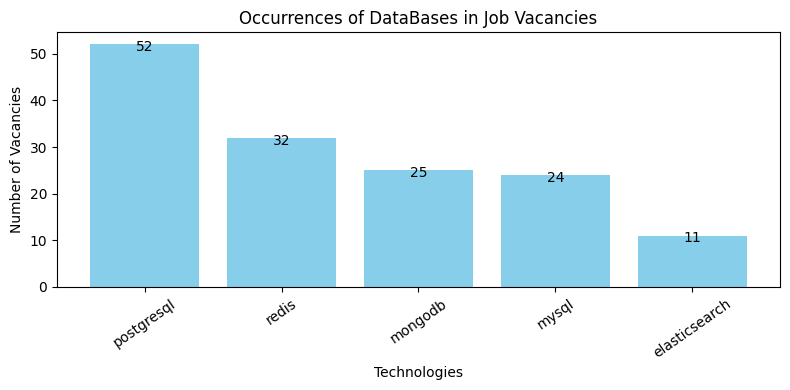

In [41]:
databases = ["postgresql", "mysql", "mongodb", "sqlite", "neo4j", "redis", "cassandra", "arangodb", "dynamo", "cosmosdb", "firestore", "clickhouse", "factordb", "elasticsearch", "riak", "vector database", "pinecone", "milvus", "postgis", "dbt", "sqlalchemy", "sqlobject"]

all_techs = df["technologies"].str.split(", ").explode()
tech_counts = all_techs[all_techs.isin(databases)].value_counts().head(5)

plt.figure(figsize=(8, 4))
bars = plt.bar(tech_counts.index, tech_counts.values, color="skyblue")

for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f"{int(height)}",
         xy=(bar.get_x() + bar.get_width() / 2, height),
         xytext=(0, 3),
         textcoords="offset points",
         ha="center", va="top"
)

plt.xlabel("Technologies")
plt.ylabel("Number of Vacancies")
plt.title("Occurrences of DataBases in Job Vacancies")
plt.xticks(rotation=35)
plt.tight_layout()

plt.savefig(f"plots/data-bases-{datetime.now().strftime('%d-%m-%y')}.png", format="png")
plt.show()

In [ ]:
databases = ["postgresql", "mysql", "mongodb", "sqlite", "neo4j", "redis", "cassandra", "arangodb", "dynamo", "cosmosdb", "firestore", "clickhouse", "factordb", "elasticsearch", "riak", "vector database", "pinecone", "milvus", "postgis", "dbt", "sqlalchemy", "sqlobject"]

all_techs = df["technologies"].str.split(", ").explode()
tech_counts = all_techs[all_techs.isin(databases)].value_counts().head(5)

plt.figure(figsize=(8, 4))
bars = plt.bar(tech_counts.index, tech_counts.values, color="skyblue")

for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f"{int(height)}",
         xy=(bar.get_x() + bar.get_width() / 2, height),
         xytext=(0, 3),
         textcoords="offset points",
         ha="center", va="top"
)

plt.xlabel("Technologies")
plt.ylabel("Number of Vacancies")
plt.title("Occurrences of DataBases in Job Vacancies")
plt.xticks(rotation=35)
plt.tight_layout()

plt.savefig(f"plots/data-bases-{datetime.now().strftime('%d-%m-%y')}.png", format="png")
plt.show()